# Preprocessing the original data

## Reading the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
isInKaggle = False
ROOT = '/kaggle/input/' if isInKaggle else 'C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/'
for dirname, _, filenames in os.walk(ROOT):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/.gitattributes
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/.gitignore
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/.Rbuildignore
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/.RData
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/.Rhistory
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/DESCRIPTION
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/NAMESPACE
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/prob_quedaAviao.html
C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Driv

In [2]:
LOCAL_DATA_FOLDER_NM =  'microbusinessDensityTS'#storeSalesTS
KAGGLE_CASE_FOLDER_NM = "godaddy-microbusiness-density-forecasting"#"store-sales-time-series-forecasting"

DATA_PATH = ROOT + KAGGLE_CASE_FOLDER_NM + '/' if isInKaggle else ROOT + "data/TimeSeries/" + LOCAL_DATA_FOLDER_NM+"/"
RESULTS_PATH = "" if isInKaggle else ROOT + "results/" + LOCAL_DATA_FOLDER_NM+"/"
train = pd.read_csv(filepath_or_buffer = DATA_PATH+"train.csv")#, index_col='row_id')
test = pd.read_csv(filepath_or_buffer = DATA_PATH+"test.csv")#, index_col='row_id')
test

row_id  cfips first_day_of_month
0       1001_2022-11-01   1001         2022-11-01
1       1003_2022-11-01   1003         2022-11-01
2       1005_2022-11-01   1005         2022-11-01
3       1007_2022-11-01   1007         2022-11-01
4       1009_2022-11-01   1009         2022-11-01
...                 ...    ...                ...
25075  56037_2023-06-01  56037         2023-06-01
25076  56039_2023-06-01  56039         2023-06-01
25077  56041_2023-06-01  56041         2023-06-01
25078  56043_2023-06-01  56043         2023-06-01
25079  56045_2023-06-01  56045         2023-06-01

[25080 rows x 3 columns]

In [3]:
train

row_id  cfips          county    state first_day_of_month   
0        1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01  \
1        1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2        1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3        1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4        1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
...                  ...    ...             ...      ...                ...   
122260  56045_2022-06-01  56045   Weston County  Wyoming         2022-06-01   
122261  56045_2022-07-01  56045   Weston County  Wyoming         2022-07-01   
122262  56045_2022-08-01  56045   Weston County  Wyoming         2022-08-01   
122263  56045_2022-09-01  56045   Weston County  Wyoming         2022-09-01   
122264  56045_2022-10-01  56045   Weston County  Wyoming         2022-10-01   

        microbusiness_density  active  
0                    3.007682    1249  
1                    2.884870    1198  
2                    3.055843    1269  
3                    2.993233    1243  
4                    2.993233    1243  
...                       ...     ...  
122260               1.803249     101  
122261               1.803249     101  
122262               1.785395     100  
122263               1.785395     100  
122264               1.785395     100  

[122265 rows x 7 columns]

In [4]:
train.dtypes

row_id                    object
cfips                      int64
county                    object
state                     object
first_day_of_month        object
microbusiness_density    float64
active                     int64
dtype: object

### Some results

In [5]:
target_nm = 'microbusiness_density'
date_col_nm = 'first_day_of_month'
quali_01 = 'cfips'; quali_01_case = 1001
train[(train[quali_01]>=quali_01_case) & (train[quali_01]<=quali_01_case+1)]

row_id  cfips          county    state first_day_of_month   
0   1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01  \
1   1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2   1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3   1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4   1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
5   1001_2020-01-01   1001  Autauga County  Alabama         2020-01-01   
6   1001_2020-02-01   1001  Autauga County  Alabama         2020-02-01   
7   1001_2020-03-01   1001  Autauga County  Alabama         2020-03-01   
8   1001_2020-04-01   1001  Autauga County  Alabama         2020-04-01   
9   1001_2020-05-01   1001  Autauga County  Alabama         2020-05-01   
10  1001_2020-06-01   1001  Autauga County  Alabama         2020-06-01   
11  1001_2020-07-01   1001  Autauga County  Alabama         2020-07-01   
12  1001_2020-08-01   1001  Autauga County  Alabama         2020-08-01   
13  1001_2020-09-01   1001  Autauga County  Alabama         2020-09-01   
14  1001_2020-10-01   1001  Autauga County  Alabama         2020-10-01   
15  1001_2020-11-01   1001  Autauga County  Alabama         2020-11-01   
16  1001_2020-12-01   1001  Autauga County  Alabama         2020-12-01   
17  1001_2021-01-01   1001  Autauga County  Alabama         2021-01-01   
18  1001_2021-02-01   1001  Autauga County  Alabama         2021-02-01   
19  1001_2021-03-01   1001  Autauga County  Alabama         2021-03-01   
20  1001_2021-04-01   1001  Autauga County  Alabama         2021-04-01   
21  1001_2021-05-01   1001  Autauga County  Alabama         2021-05-01   
22  1001_2021-06-01   1001  Autauga County  Alabama         2021-06-01   
23  1001_2021-07-01   1001  Autauga County  Alabama         2021-07-01   
24  1001_2021-08-01   1001  Autauga County  Alabama         2021-08-01   
25  1001_2021-09-01   1001  Autauga County  Alabama         2021-09-01   
26  1001_2021-10-01   1001  Autauga County  Alabama         2021-10-01   
27  1001_2021-11-01   1001  Autauga County  Alabama         2021-11-01   
28  1001_2021-12-01   1001  Autauga County  Alabama         2021-12-01   
29  1001_2022-01-01   1001  Autauga County  Alabama         2022-01-01   
30  1001_2022-02-01   1001  Autauga County  Alabama         2022-02-01   
31  1001_2022-03-01   1001  Autauga County  Alabama         2022-03-01   
32  1001_2022-04-01   1001  Autauga County  Alabama         2022-04-01   
33  1001_2022-05-01   1001  Autauga County  Alabama         2022-05-01   
34  1001_2022-06-01   1001  Autauga County  Alabama         2022-06-01   
35  1001_2022-07-01   1001  Autauga County  Alabama         2022-07-01   
36  1001_2022-08-01   1001  Autauga County  Alabama         2022-08-01   
37  1001_2022-09-01   1001  Autauga County  Alabama         2022-09-01   
38  1001_2022-10-01   1001  Autauga County  Alabama         2022-10-01   

    microbusiness_density  active  
0                3.007682    1249  
1                2.884870    1198  
2                3.055843    1269  
3                2.993233    1243  
4                2.993233    1243  
5                2.969090    1242  
6                2.909326    1217  
7                2.933231    1227  
8                3.000167    1255  
9                3.004948    1257  
10               3.019292    1263  
11               3.083837    1290  
12               3.174679    1328  
13               3.205756    1341  
14               3.193804    1336  
15               3.038416    1271  
16               3.002558    1256  
17               2.947244    1243  
18               3.106106    1310  
19               3.144043    1326  
20               3.224659    1360  
21               3.227030    1361  
22               3.222288    1359  
23               3.210433    1354  
24               3.219917    1358  
25               3.186722    1344  
26               3.203320    1351  
27               3.200948    1350  
28      

In [1]:
train[target_nm].describe()#.value_counts(bins=20)#.describe()#

NameError: name 'train' is not defined

In [ ]:
#Each family has the same number of stores of the remainig ones ...
print(quali_01)
train[quali_01].value_counts(sort=False)#.describe()
# train['family'].value_counts(sort=False)
# train['date'].value_counts(sort=False).describe()


cfips


cfips
1001     39
1003     39
1005     39
1007     39
1009     39
         ..
56037    39
56039    39
56041    39
56043    39
56045    39
Name: count, Length: 3135, dtype: int64

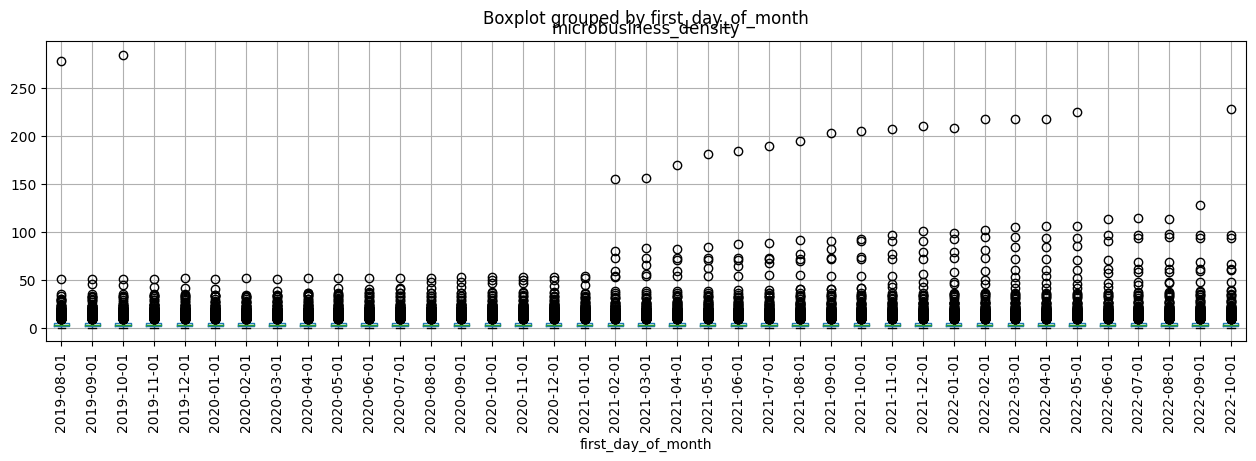

In [ ]:
# train[:round(.01*train.shape[0])].boxplot(column=target, by=date_col_nm, rot = 90, figsize=(15, 4))
train.boxplot(column=target_nm, by=date_col_nm, rot = 90, figsize=(15, 4));

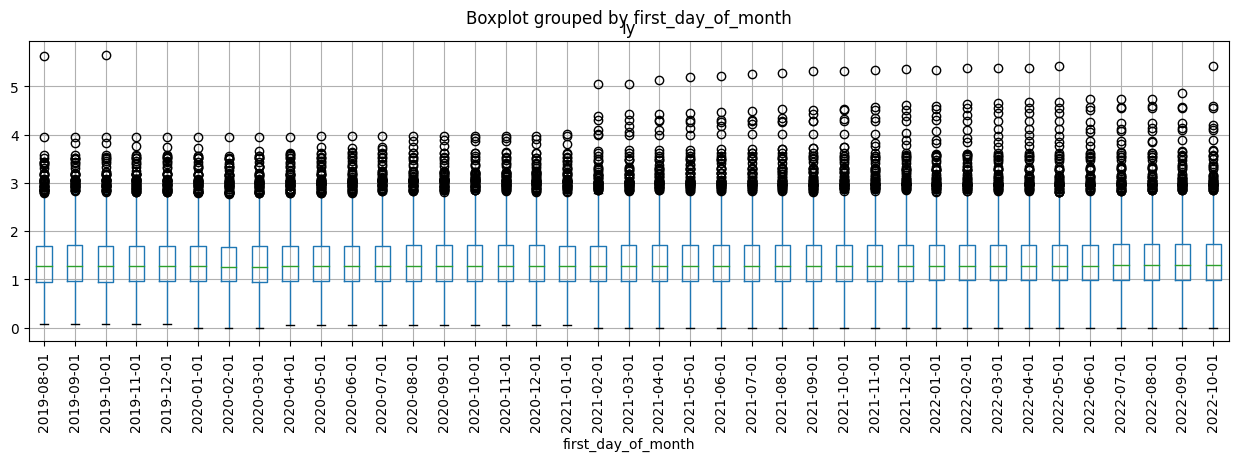

In [ ]:
train['ly'] = np.log1p(train[target_nm])#log(1+y)
train.boxplot(column='ly', by=date_col_nm, rot = 90, figsize=(15, 4));

## Converting the original data into Time Series (TS)

In [ ]:
#Computing time series data set
#print(train.dtypes)
def getCategories(varName, dataFrame):
    labels = dataFrame[varName].value_counts().reset_index(
            name='Freq').rename(columns={'index': varName}).sort_values(by=varName)
    labels = labels[varName].tolist()
    print("********** " + varName + " **********")
    print("length = ", len(labels))
    print(labels[:2], ' ... ', labels[len(labels)-2:])
    return(labels)
dates = getCategories(varName = date_col_nm, dataFrame = train)
cfipss = getCategories(varName = 'cfips', dataFrame = train)
# stores = getCategories(varName = 'store_nbr', dataFrame = train)
print('>>> We have a total of '+ str(len(cfipss)) + ' time series (TS), each one with '+ 
str(len(dates)) + ' observations in the train set.')

********** first_day_of_month **********
length =  39
['2019-08-01', '2019-09-01']  ...  ['2022-09-01', '2022-10-01']
********** cfips **********
length =  3135
[1001, 1003]  ...  [56043, 56045]
>>> We have a total of 3135 time series (TS), each one with 39 observations in the train set.


### MORE EFFICIENT AND RELIABLE METHOD FOR TS COMPUTATION

In [ ]:
from csv import writer
def computeTimeSeries(idRelatedDataFrame, outputFilePath):
    df = idRelatedDataFrame
    colNames = []
    n = 2
    dates = getCategories(varName = date_col_nm, dataFrame = idRelatedDataFrame)
    print('>>> from ' + dates[0] + ' to ' + dates[len(dates)-1] + " <<< ") 
    isToAppendColNames = False
    startDateIndex = 0
    try:
        data =pd.read_csv(outputFilePath, encoding='ISO-8859-1')#it will work if the file exists
        startDateIndex = len(data)
    except:
        isToAppendColNames = True
    inc = startDateIndex
    with open(outputFilePath,'a') as fd:
        csv_writer = writer(fd)
        for t in dates[startDateIndex:]:#(n+startDateIndex+1)]:
            inc = inc + 1
            if(isToAppendColNames == True):
                colNames.append('date')
            row_t = []
            row_t.append(t)
            for c in cfipss:#[:n]:
                data_tc = df[(df[date_col_nm]==t) & (df['cfips']==c)]
                if(idRelatedDataFrame is train):
                    if(isToAppendColNames == True):
                        colNames.append('y_'+str(c))
                        # colNames.append('active_'+str(c))
                    row_t.append(float(data_tc[target_nm]))
                    # row_t.append(int(data_tc['active']))
    #         print(row_t)
            if(isToAppendColNames == True):
                isToAppendColNames = False
                csv_writer.writerow(colNames)
            csv_writer.writerow(row_t)
            print(t + " is done -> " + str(round(100*inc/len(dates), 2)) + "%")
    ret = pd.read_csv(outputFilePath)
    print('>>> Time Series computation complited!!')
    return(ret)

ts_train_validation = computeTimeSeries(idRelatedDataFrame = train, outputFilePath = DATA_PATH+'/train_TS.csv')
ts_test = computeTimeSeries(idRelatedDataFrame = test, outputFilePath = DATA_PATH+'/test_TS.csv')
print('ts_train_validation.shape = ', ts_train_validation.shape)
print('ts_test.shape = ', ts_test.shape)
print('********** ts_train_validation head **********')
ts_train_validation.head(5)

********** first_day_of_month **********
length =  39
['2019-08-01', '2019-09-01']  ...  ['2022-09-01', '2022-10-01']
>>> from 2019-08-01 to 2022-10-01 <<< 


C:\Users\praf6\AppData\Local\Temp\ipykernel_15224\1815070756.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  row_t.append(float(data_tc[target_nm]))


2019-08-01 is done -> 2.56%
2019-09-01 is done -> 5.13%
2019-10-01 is done -> 7.69%
2019-11-01 is done -> 10.26%
2019-12-01 is done -> 12.82%
2020-01-01 is done -> 15.38%
2020-02-01 is done -> 17.95%
2020-03-01 is done -> 20.51%
2020-04-01 is done -> 23.08%
2020-05-01 is done -> 25.64%
2020-06-01 is done -> 28.21%
2020-07-01 is done -> 30.77%
2020-08-01 is done -> 33.33%
2020-09-01 is done -> 35.9%
2020-10-01 is done -> 38.46%
2020-11-01 is done -> 41.03%
2020-12-01 is done -> 43.59%
2021-01-01 is done -> 46.15%
2021-02-01 is done -> 48.72%
2021-03-01 is done -> 51.28%
2021-04-01 is done -> 53.85%
2021-05-01 is done -> 56.41%
2021-06-01 is done -> 58.97%
2021-07-01 is done -> 61.54%
2021-08-01 is done -> 64.1%
2021-09-01 is done -> 66.67%
2021-10-01 is done -> 69.23%
2021-11-01 is done -> 71.79%
2021-12-01 is done -> 74.36%
2022-01-01 is done -> 76.92%
2022-02-01 is done -> 79.49%
2022-03-01 is done -> 82.05%
2022-04-01 is done -> 84.62%
2022-05-01 is done -> 87.18%
2022-06-01 is done 

date    y_1001    y_1003    y_1005    y_1007    y_1009    y_1011   
0  2019-08-01  3.007682  7.239156  1.073138  1.310777  1.544148  0.926372  \
1  2019-09-01  2.884870  7.290936  0.995794  1.305176  1.575892  0.998556   
2  2019-10-01  3.055843  7.425439  1.160149  1.254761  1.546415  0.974495   
3  2019-11-01  2.993233  7.426071  1.000628  1.254761  1.573625  1.022618   
4  2019-12-01  2.993233  7.470274  1.000628  1.265965  1.555485  1.034649   

     y_1013    y_1015    y_1017  ...   y_56027   y_56029   y_56031    y_56033   
0  0.674981  2.691544  1.486542  ...  1.150575  5.916088  4.062681  30.183279  \
1  0.739265  2.703752  1.355156  ...  1.150575  5.894528  3.888567  31.712736   
2  0.713551  2.693764  1.355156  ...  1.150575  5.881592  3.903076  31.990431   
3  1.054256  2.739270  1.362664  ...  1.200600  5.954897  3.845038  32.776520   
4  1.054256  2.729281  1.343894  ...  1.200600  5.911776  3.845038  32.806427   

    y_56035   y_56037    y_56039   y_56041   y_56043   y_56045  
0  6.115724  2.640386  26.433363  4.612016  2.603246  1.548594  
1  6.142085  2.858371  26.611856  4.338306  2.683593  1.530794  
2  6.181626  2.913635  26.736261  4.420419  2.635385  1.530794  
3  6.234348  3.008812  26.920164  4.372520  2.683593  1.601994  
4  6.273890  3.088637  26.903938  4.310935  2.635385  1.584194  

[5 rows x 3136 columns]

In [ ]:
print('>>> We have ', str(len(cfipss)), " time series. One for each county.\n",
      len(ts_train_validation), ' rows (months) in the training/validation set, and \n',
      len(ts_test), ' rows (months) in the test set. Thus, the models must forecast ', 
      len(ts_test), ' steps (months) ahead, for each county!')
ts_test

>>> We have  3135  time series. One for each county.
 39  rows (months) in the training/validation set, and 
 8  rows (months) in the test set. Thus, the models must forecast  8  steps (months) ahead, for each county!


date
0  2022-11-01
1  2022-12-01
2  2023-01-01
3  2023-02-01
4  2023-03-01
5  2023-04-01
6  2023-05-01
7  2023-06-01

# Preprocessing Time Series

## Preliminaries

### considering `date` column as date time and the index

In [ ]:
def setDateAsIndexAndDatetime (df):
    try:
        df.set_index('date', inplace=True)
    except Exception:
        pass
    df.index = pd.to_datetime(df.index)
setDateAsIndexAndDatetime (ts_train_validation)
setDateAsIndexAndDatetime (ts_test)


In [ ]:
ts_train_validation.head(2)

y_1001    y_1003    y_1005    y_1007    y_1009    y_1011  \
date                                                                     
2019-08-01  3.007682  7.239156  1.073138  1.310777  1.544148  0.926372   
2019-09-01  2.884870  7.290936  0.995794  1.305176  1.575892  0.998556   

              y_1013    y_1015    y_1017    y_1019  ...   y_56027   y_56029  \
date                                                ...                       
2019-08-01  0.674981  2.691544  1.486542  1.104277  ...  1.150575  5.916088   
2019-09-01  0.739265  2.703752  1.355156  1.089747  ...  1.150575  5.894528   

             y_56031    y_56033   y_56035   y_56037    y_56039   y_56041  \
date                                                                       
2019-08-01  4.062681  30.183279  6.115724  2.640386  26.433363  4.612016   
2019-09-01  3.888567  31.712736  6.142085  2.858371  26.611856  4.338306   

             y_56043   y_56045  
date                            
2019-08-01  2.603246  1.548594  
2019-09-01  2.683593  1.530794  

[2 rows x 3135 columns]

### Taking the label of the target variables

In [ ]:
import random
targetsNms = [tgtColumn for tgtColumn in ts_train_validation.columns if ('y_' in tgtColumn)]
nTargets = len(targetsNms) #2#you can increase nTargets if you wish
targetsNms = targetsNms[:nTargets]
print('nTargets = ', nTargets)
print('some targets: ', random.sample(targetsNms, 20))

nTargets =  3135
some targets:  ['y_12107', 'y_49039', 'y_39031', 'y_53071', 'y_13109', 'y_48313', 'y_16037', 'y_48181', 'y_6027', 'y_48129', 'y_13215', 'y_29057', 'y_22095', 'y_5107', 'y_50023', 'y_24043', 'y_37147', 'y_39107', 'y_13015', 'y_26117']


### Initial graphics

In [ ]:
# !pip install chart-studio
# !pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# import xgboost as xgb
# import chart_studio.plotly as py
# import chart_studio.graph_objs as go
# from chart_studio.offline import init_notebook_mode, iplot
plt.style.use('fivethirtyeight')
color_palette = sns.color_palette()
styles=10*['bs-', 'ro-', 'y^-', 'rs-','go-','b^-', 'r*-','bo-']

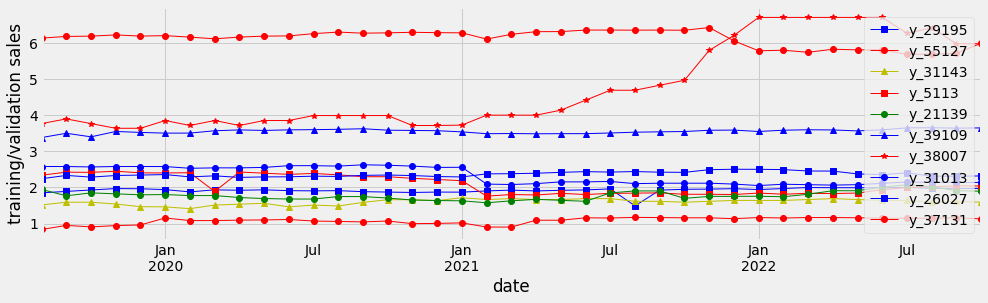

y_1001    y_1003    y_1005    y_1007    y_1009    y_1011  \
date                                                                     
2022-06-01  3.346197  8.507496  1.191678  1.275998  1.773202  0.937421   
2022-07-01  3.437971  8.573463  1.216926  1.326588  1.831783  0.950089   
2022-08-01  3.423852  8.491150  1.196728  1.292861  1.836289  0.962757   
2022-09-01  3.442677  8.341701  1.206827  1.315346  1.852060  0.975424   
2022-10-01  3.463856  8.359798  1.232074  1.287240  1.831783  0.988092   

              y_1013    y_1015    y_1017    y_1019  ...   y_56027   y_56029  \
date                                                ...                       
2022-06-01  1.983687  2.724583  1.468978  1.117345  ...  1.713062  6.101229   
2022-07-01  2.042414  2.782648  1.548280  1.141118  ...  1.766595  6.191458   
2022-08-01  2.107667  2.788231  1.521846  1.131609  ...  1.766595  6.221535   
2022-09-01  2.166395  2.809447  1.502964  1.131609  ...  1.766595  6.178568   
2022-10-01  2.185970  2.800514  1.442544  1.117345  ...  1.713062  6.217238   

             y_56031    y_56033   y_56035   y_56037    y_56039   y_56041  \
date                                                                       
2022-06-01  3.212966  113.19935  7.739897  2.783238  25.652266  3.906035   
2022-07-01  3.184532  114.09351  7.884691  2.836282  25.939260  3.981813   
2022-08-01  3.156099  113.44169  7.779387  2.811320  26.085369  3.974924   
2022-09-01  3.170316  128.26224  7.792550  2.811320  26.090586  3.995591   
2022-10-01  3.212966  227.75665  7.792550  2.823801  26.273220  4.009369   

             y_56043   y_56045  
date                            
2022-06-01  3.126551  1.803249  
2022-07-01  3.225807  1.803249  
2022-08-01  3.209264  1.785395  
2022-09-01  3.209264  1.785395  
2022-10-01  3.126551  1.785395  

[5 rows x 3135 columns]

In [ ]:
nTrialTargets = 10
random.seed(0)
trialTargetsNms =  random.sample(targetsNms, nTrialTargets)  # some study cases
ts_train_validation[trialTargetsNms].plot(style=styles[:len(
                                              trialTargetsNms)],
                                          figsize=(15, 4),
                                        #   color=color_palette[:len(
                                        #       trialTargetsNms)],
                                          ylabel='training/validation sales',
                                          legend=trialTargetsNms,
                                          linewidth=1)
plt.show()
ts_train_validation.tail()


In [ ]:
# Time series range
print("train/validation begin date: ", ts_train_validation.index[0])
print("train/validation end date: ", ts_train_validation.index[len(ts_train_validation)-1])
print("test begin date: ", ts_test.index[0])
print("test end date: ", ts_test.index[len(ts_test)-1])
# As one has a daily TS, there is no need to imput missing values between the train end date and test bgin date

train/validation begin date:  2019-08-01 00:00:00
train/validation end date:  2022-10-01 00:00:00
test begin date:  2022-11-01 00:00:00
test end date:  2023-06-01 00:00:00


## Preventing tendency, heterogeneity, and outliers in the target time series
Some times, there is tendency and heterogeneity in the time series. It will difficult the modeling and forecasting. To prevent these problems, one can apply the logarithm and then the difference on the log-series:

### Apllying log(y_t+1) tranformation

In [ ]:
#https://scikit-learn.org/stable/modules/preprocessing.html
# import numpy as np
from sklearn.preprocessing import FunctionTransformer
l_targetsNms = [('l' + targetNm) for targetNm in targetsNms]
print('Some l_targetsNms:', l_targetsNms[:nTrialTargets])
log1pTransformer = FunctionTransformer(np.log1p, validate=True)#log(1+y_t)
l_ts_train_validation = pd.DataFrame(log1pTransformer.transform(ts_train_validation[targetsNms]),
                                        columns = l_targetsNms, index = ts_train_validation.index)
l_ts_train_validation.to_csv(DATA_PATH+"l_ts_train_validation.csv")
#to tranrform back to the original scale of the variables, one can use np.expm1(ly_t)
l_ts_train_validation.tail(3)


Some l_targetsNms: ['ly_1001', 'ly_1003', 'ly_1005', 'ly_1007', 'ly_1009', 'ly_1011', 'ly_1013', 'ly_1015', 'ly_1017', 'ly_1019']


C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


ly_1001   ly_1003   ly_1005   ly_1007   ly_1009   ly_1011  \
date                                                                     
2022-08-01  1.487011  2.250360  0.786969  0.829800  1.042496  0.674350   
2022-09-01  1.491257  2.234488  0.791556  0.839559  1.048042  0.680783   
2022-10-01  1.496013  2.236424  0.802931  0.827346  1.040906  0.687176   

             ly_1013   ly_1015   ly_1017   ly_1019  ...  ly_56027  ly_56029  \
date                                                ...                       
2022-08-01  1.133872  1.331899  0.924991  0.756877  ...  1.017617  1.977067   
2022-09-01  1.152594  1.337484  0.917476  0.756877  ...  1.017617  1.971100   
2022-10-01  1.158757  1.335136  0.893040  0.750163  ...  0.998078  1.976472   

            ly_56031  ly_56033  ly_56035  ly_56037  ly_56039  ly_56041  \
date                                                                     
2022-08-01  1.424577  4.740065  2.172407  1.337976  3.298994  1.604410   
2022-09-01  1.427992  4.861843  2.173905  1.337976  3.299186  1.608556   
2022-10-01  1.438167  5.432659  2.173905  1.341245  3.305905  1.611310   

            ly_56043  ly_56045  
date                            
2022-08-01  1.437288   1.02439  
2022-09-01  1.437288   1.02439  
2022-10-01  1.417442   1.02439  

[3 rows x 3135 columns]

for mdb_1001[0] = 3.007682:  1.3882130193175095


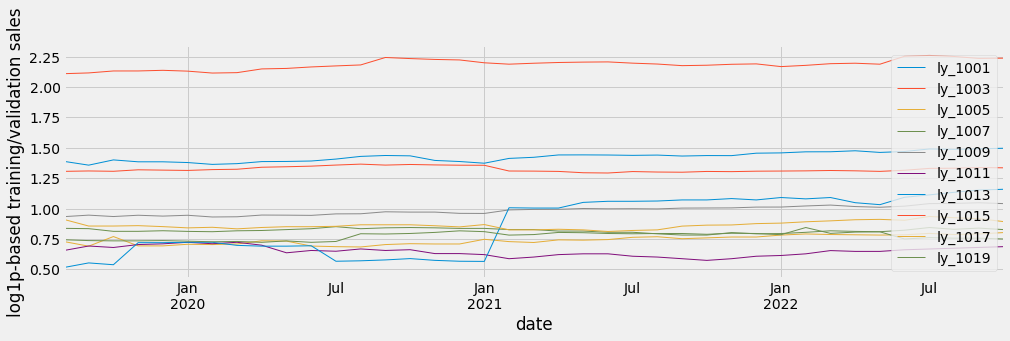

In [ ]:
print('for mdb_1001[0] = 3.007682: ', np.log(3.007682+1))
# print('for AUTOMOTIVE_2_sales[0] = 14: ', np.log(14+1))
l_ts_train_validation[l_targetsNms[:10]].plot(style='-',
                                          figsize=(15, 4),
                                          color=color_palette[:nTrialTargets],
                                          ylabel='log1p-based training/validation sales',
                                          legend=l_targetsNms[:nTrialTargets],
                                          linewidth=1)
plt.show()


### Apllying a first-order difference to the log-based series

In [ ]:
dl_targetsNms = [('dl' + targetNm) for targetNm in targetsNms]
# print('Some dl_targetsNms:', dl_targetsNms[:5])
dl_ts_train_validation = l_ts_train_validation.diff()
dl_ts_train_validation.columns=dl_targetsNms
dl_ts_train_validation.fillna(inplace=True, method='backfill')
dl_ts_train_validation.head(3)

dly_1001  dly_1003  dly_1005  dly_1007  dly_1009  dly_1011  \
date                                                                     
2019-08-01 -0.031123  0.006265 -0.038021 -0.002427  0.012400  0.036787   
2019-09-01 -0.031123  0.006265 -0.038021 -0.002427  0.012400  0.036787   
2019-10-01  0.043069  0.016093  0.079135 -0.022113 -0.011509 -0.012113   

            dly_1013  dly_1015  dly_1017  dly_1019  ...  dly_56027  dly_56029  \
date                                                ...                         
2019-08-01  0.037661  0.003302 -0.054286 -0.006929  ...        0.0  -0.003122   
2019-09-01  0.037661  0.003302 -0.054286 -0.006929  ...        0.0  -0.003122   
2019-10-01 -0.014895 -0.002701  0.000000 -0.002320  ...        0.0  -0.001878   

            dly_56031  dly_56033  dly_56035  dly_56037  dly_56039  dly_56041  \
date                                                                           
2019-08-01  -0.034997   0.047882   0.003698   0.058155   0.006485  -0.050002   
2019-09-01  -0.034997   0.047882   0.003698   0.058155   0.006485  -0.050002   
2019-10-01   0.002964   0.008453   0.005521   0.014221   0.004495   0.015265   

            dly_56043  dly_56045  
date                              
2019-08-01   0.022054  -0.007009  
2019-09-01   0.022054  -0.007009  
2019-10-01  -0.013174   0.000000  

[3 rows x 3135 columns]

dl for mbd_1001 at 2019-10-01: 0.07419200000000001


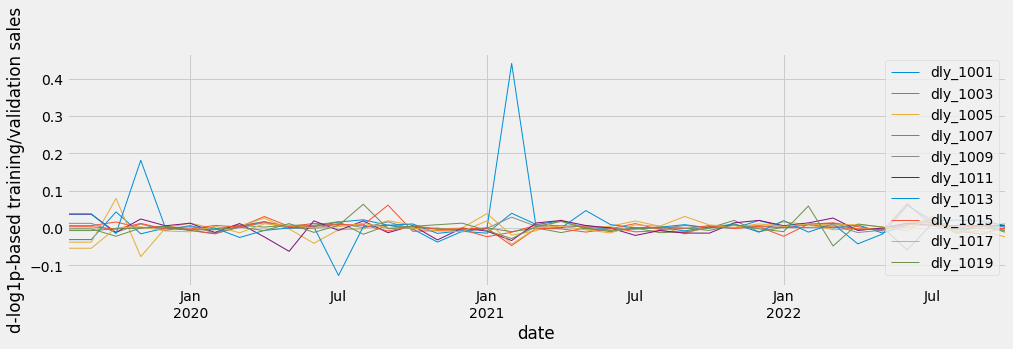

In [ ]:
print('dl for mbd_1001 at 2019-10-01:', str(0.043069-(-0.031123)))
dl_ts_train_validation[dl_targetsNms[:nTrialTargets]].plot(style='-',
                                          figsize=(15, 4),
                                          color=color_palette[:nTrialTargets],
                                          ylabel='d-log1p-based training/validation sales',
                                          legend=dl_targetsNms[:nTrialTargets],
                                          linewidth=1)
plt.show();


### Standardizing the `d-log1p` target time series (`d_targetsNms`)

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
import joblib
zdl_scaler = StandardScaler()
zdl_scaler.fit(dl_ts_train_validation)
joblib.dump(zdl_scaler, RESULTS_PATH+'zdl_scaler.joblib', compress=3)
zdl_targetsNms = [('zdl' + targetNm) for targetNm in targetsNms]#+['z_mdl_mbd']

print(dl_targetsNms[:2], 'mean and std:')
print('means: ', zdl_scaler.mean_[:2])
print('stds: ', zdl_scaler.scale_[:2])

zdl_ts_train_validation = pd.DataFrame(zdl_scaler.transform(dl_ts_train_validation), 
                        columns= zdl_targetsNms, 
                        index = ts_train_validation.index)
zdl_ts_train_validation.head(3)

['dly_1001', 'dly_1003'] mean and std:
means:  [0.00196606 0.00343053]
stds:  [0.01630903 0.01757458]


zdly_1001  zdly_1003  zdly_1005  zdly_1007  zdly_1009  zdly_1011  \
date                                                                           
2019-08-01  -2.028906   0.161282  -1.641972   -0.21043   1.040223   1.796772   
2019-09-01  -2.028906   0.161282  -1.641972   -0.21043   1.040223   1.796772   
2019-10-01   2.520259   0.720482   3.298081   -2.18087  -1.623839  -0.711040   

            zdly_1013  zdly_1015  zdly_1017  zdly_1019  ...  zdly_56027  \
date                                                    ...               
2019-08-01   0.254454   0.252249  -2.935665  -0.342663  ...   -0.294843   
2019-09-01   0.254454   0.252249  -2.935665  -0.342663  ...   -0.294843   
2019-10-01  -0.407275  -0.360451   0.103557  -0.114126  ...   -0.294843   

            zdly_56029  zdly_56031  zdly_56033  zdly_56035  zdly_56037  \
date                                                                     
2019-08-01   -0.339479   -1.749026   -0.034563   -0.104101    2.468208   
2019-09-01   -0.339479   -1.749026   -0.034563   -0.104101    2.468208   
2019-10-01   -0.237332    0.510150   -0.341348    0.000040    0.510978   

            zdly_56039  zdly_56041  zdly_56043  zdly_56045  
date                                                        
2019-08-01    0.501311   -1.540504    0.762782   -0.581612  
2019-09-01    0.501311   -1.540504    0.762782   -0.581612  
2019-10-01    0.347104    0.654437   -0.729125   -0.134013  

[3 rows x 3135 columns]

### Appending the standard zdl-targets means to `zdl_ts_train_validation`

In [ ]:
aggregatedVarNm = 'zmzdly'
mzdly = zdl_ts_train_validation[zdl_targetsNms].mean(axis=1)#the mean of the zdl time series
zdl_ts_train_validation[aggregatedVarNm] = (mzdly - mzdly.mean())/mzdly.std()# the standard of the mean time series
zdl_targetsNms += [aggregatedVarNm] 
print('mzdl mean: ', zdl_ts_train_validation[aggregatedVarNm].mean())
print('mzdl std: ', zdl_ts_train_validation[aggregatedVarNm].std())
zdl_ts_train_validation.head(3)

mzdl mean:  -7.11681426041767e-18
mzdl std:  1.0


zdly_1001  zdly_1003  zdly_1005  zdly_1007  zdly_1009  zdly_1011  \
date                                                                           
2019-08-01  -2.028906   0.161282  -1.641972   -0.21043   1.040223   1.796772   
2019-09-01  -2.028906   0.161282  -1.641972   -0.21043   1.040223   1.796772   
2019-10-01   2.520259   0.720482   3.298081   -2.18087  -1.623839  -0.711040   

            zdly_1013  zdly_1015  zdly_1017  zdly_1019  ...  zdly_56029  \
date                                                    ...               
2019-08-01   0.254454   0.252249  -2.935665  -0.342663  ...   -0.339479   
2019-09-01   0.254454   0.252249  -2.935665  -0.342663  ...   -0.339479   
2019-10-01  -0.407275  -0.360451   0.103557  -0.114126  ...   -0.237332   

            zdly_56031  zdly_56033  zdly_56035  zdly_56037  zdly_56039  \
date                                                                     
2019-08-01   -1.749026   -0.034563   -0.104101    2.468208    0.501311   
2019-09-01   -1.749026   -0.034563   -0.104101    2.468208    0.501311   
2019-10-01    0.510150   -0.341348    0.000040    0.510978    0.347104   

            zdly_56041  zdly_56043  zdly_56045    zmzdly  
date                                                      
2019-08-01   -1.540504    0.762782   -0.581612 -0.084085  
2019-09-01   -1.540504    0.762782   -0.581612 -0.084085  
2019-10-01    0.654437   -0.729125   -0.134013 -0.279452  

[3 rows x 3136 columns]

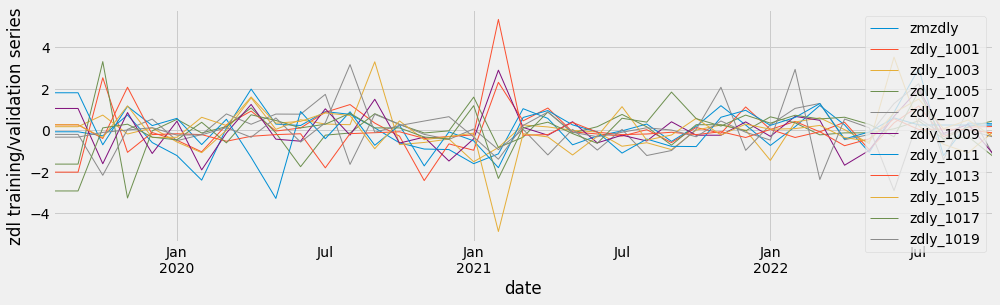

In [ ]:
zdl_ts_train_validation[[aggregatedVarNm]+zdl_targetsNms[:nTrialTargets]].plot(style='-',
                                          figsize=(15, 4),
                                          color=color_palette[:nTrialTargets+1],
                                          ylabel='zdl training/validation series',
                                          legend=zdl_targetsNms[:nTrialTargets+1],
                                          linewidth=1)
plt.show();


<AxesSubplot:>

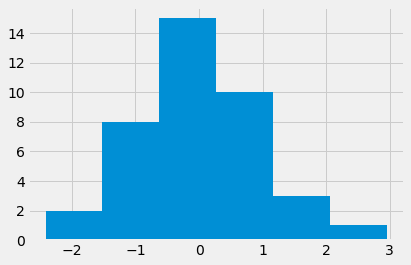

In [ ]:
zdl_ts_train_validation[aggregatedVarNm].hist(bins=np.int0(np.sqrt(len(zdl_ts_train_validation))))

## Features Creation

### Appending Outliers Features

In [ ]:
from scipy.stats import norm
dist = norm(loc = 0, scale = 1)#Omega_X = {x\in R}
z=1.28
print('P(Z>z)=', str(dist.sf(z)))
print('q(p)=', str(dist.ppf(.1)))

P(Z>z)= 0.10027256795444206
q(p)= -1.2815515655446004


In [ ]:
#https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
zdl_u_outlier_targetNms = [('zdl_u_out_' + targetNm) for targetNm in targetsNms] + ['zmzdl_u_out']#upper outliers
zdl_l_outlier_targetNms = [('zdl_l_out_' + targetNm) for targetNm in targetsNms]+ ['zmzdl_l_out']#lower outliers

def appendOutliersFeatures(df = zdl_ts_train_validation, z=3):
    zdlDf = df[zdl_targetsNms]
    zdl_u_outlier =  (zdlDf > z).astype(int)
    zdl_u_outlier.columns = zdl_u_outlier_targetNms
    # zdl_u_outlier.index = df.index

    zdl_l_outlier =  (zdlDf < -z).astype(int)
    zdl_l_outlier.columns = zdl_l_outlier_targetNms
    df = pd.concat([zdl_l_outlier, zdl_u_outlier, df], axis=1)
    return df

zdl_ts_train_validation = appendOutliersFeatures(zdl_ts_train_validation, z=z)
zdl_ts_train_validation[[zdl_targetsNms[2], zdl_l_outlier_targetNms[2], zdl_u_outlier_targetNms[2], 'zmzdl_l_out', 'zmzdl_u_out']].head(3)

zdly_1005  zdl_l_out_y_1005  zdl_u_out_y_1005  zmzdl_l_out  \
date                                                                     
2019-08-01  -1.641972                 1                 0            0   
2019-09-01  -1.641972                 1                 0            0   
2019-10-01   3.298081                 0                 1            0   

            zmzdl_u_out  
date                     
2019-08-01            0  
2019-09-01            0  
2019-10-01            0

In [ ]:
len(zdl_l_outlier_targetNms)

3136

In [ ]:
zdl_ts_train_validation[zdl_l_outlier_targetNms].sum().describe()

count    3136.000000
mean        2.580038
std         1.387793
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
dtype: float64

In [ ]:
zdl_ts_train_validation[zdl_u_outlier_targetNms].sum().describe()

count    3136.000000
mean        2.614158
std         1.387243
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
dtype: float64

### Apending Calendar Features

In [ ]:
calendarFeatures = ['daycount', 'dayofyear', 'month', 'year']
def appendCalendarFeatures(df, startDayCount = 0):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    if 'hour' in calendarFeatures:
        df['hour'] = df.date.dt.hour
    if 'daycount' in calendarFeatures:
        df['daycount'] = range(startDayCount, startDayCount+len(df))
    if 'dayofweek' in calendarFeatures:
        df['dayofweek'] = df.date.dt.dayofweek#0 represents monday
    if 'dayofmonth' in calendarFeatures:
        df['dayofmonth'] = df.date.dt.day
    if 'dayofyear' in calendarFeatures:
        df['dayofyear'] = df.date.dt.dayofyear
    if 'month' in calendarFeatures:
        df['month'] = df.date.dt.month
    if 'quarter' in calendarFeatures:
        df['quarter'] = df.date.dt.quarter
    if 'year' in calendarFeatures:
        df['year'] = df.date.dt.year
    if 'weekofyear' in calendarFeatures:
        df['weekofyear'] = df.date.dt.isocalendar().week
    print(">>> Calendar Features Appended: "+str(calendarFeatures))
    display(df)
    return df
zdl_ts_train_validation = appendCalendarFeatures(zdl_ts_train_validation)
zdl_ts_train_validation[calendarFeatures + zdl_targetsNms].head(5)#'dayofweek', 'dayofmonth', 

>>> Calendar Features Appended: ['daycount', 'dayofweek', 'dayofmonth', 'dayofyear', 'month', 'year']


NameError: name 'test_TS' is not defined

In [ ]:
ts_test = appendCalendarFeatures(ts_test)
ts_test

>>> Calendar Features Appended: ['daycount', 'dayofweek', 'dayofmonth', 'dayofyear', 'month', 'year']


daycount  dayofyear  month  year
date                                        
2022-11-01         0        305     11  2022
2022-12-01         1        335     12  2022
2023-01-01         2          1      1  2023
2023-02-01         3         32      2  2023
2023-03-01         4         60      3  2023
2023-04-01         5         91      4  2023
2023-05-01         6        121      5  2023
2023-06-01         7        152      6  2023

#### Standardizing the calendar features

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
import joblib
z_calendarScaler = StandardScaler()
z_calendarScaler.fit(zdl_ts_train_validation[calendarFeatures])
joblib.dump(z_calendarScaler, RESULTS_PATH+'z_calendarScaler.joblib', compress=3)
z_calendarFeatures = [('zc_' + calendarFeature) for calendarFeature in calendarFeatures]#+['z_mdl_mbd']

print(z_calendarFeatures, 'mean and std:')
print('means: ', z_calendarScaler.mean_)
print('stds: ', z_calendarScaler.scale_)

zdl_ts_train_validation = pd.concat([pd.DataFrame(z_calendarScaler.transform(zdl_ts_train_validation[calendarFeatures]), 
                        columns= z_calendarFeatures, index = zdl_ts_train_validation.index), 
                        zdl_ts_train_validation], axis=1)
zdl_ts_train_validation.head(3)

['zc_daycount', 'zc_dayofyear', 'zc_month', 'zc_year'] mean and std:
means:  [  19.          173.61538462    6.69230769 2020.69230769]
stds:  [ 11.25462868 103.20669214   3.39043788   0.99108452]


zc_daycount  zc_dayofyear  zc_month   zc_year  zdl_l_out_y_1001  \
date                                                                          
2019-08-01    -1.688194      0.381609  0.385700 -1.707531                 1   
2019-09-01    -1.599342      0.681977  0.680647 -1.707531                 1   
2019-10-01    -1.510490      0.972656  0.975594 -1.707531                 0   

            zdl_l_out_y_1003  zdl_l_out_y_1005  zdl_l_out_y_1007  \
date                                                               
2019-08-01                 0                 1                 0   
2019-09-01                 0                 1                 0   
2019-10-01                 0                 0                 1   

            zdl_l_out_y_1009  zdl_l_out_y_1011  ...  zdly_56037  zdly_56039  \
date                                            ...                           
2019-08-01                 0                 0  ...    2.468208    0.501311   
2019-09-01                 0                 0  ...    2.468208    0.501311   
2019-10-01                 1                 0  ...    0.510978    0.347104   

            zdly_56041  zdly_56043  zdly_56045    zmzdly  daycount  dayofyear  \
date                                                                            
2019-08-01   -1.540504    0.762782   -0.581612 -0.084085         0        213   
2019-09-01   -1.540504    0.762782   -0.581612 -0.084085         1        244   
2019-10-01    0.654437   -0.729125   -0.134013 -0.279452         2        274   

            month  year  
date                     
2019-08-01      8  2019  
2019-09-01      9  2019  
2019-10-01     10  2019  

[3 rows x 9416 columns]

In [ ]:
ts_test = pd.concat([pd.DataFrame(z_calendarScaler.transform(ts_test[calendarFeatures]), 
                        columns= z_calendarFeatures, index = ts_test.index), 
                        ts_test], axis=1)

ts_test.head(3)

zc_daycount  zc_dayofyear  zc_month   zc_year  daycount  \
date                                                                  
2022-11-01    -1.688194      1.273024  1.270542  1.319456         0   
2022-12-01    -1.599342      1.563703  1.565489  1.319456         1   
2023-01-01    -1.510490     -1.672521 -1.678930  2.328452         2   

            dayofyear  month  year  
date                                
2022-11-01        305     11  2022  
2022-12-01        335     12  2022  
2023-01-01          1      1  2023

In [ ]:
ts_test.to_csv(DATA_PATH+'test_TS.csv')

### Lag Features Computation

#### Trials

In [ ]:
zdl_ts_train_validation['zmzdly'].describe()

count    3.900000e+01
mean    -7.116814e-18
std      1.000000e+00
min     -2.414903e+00
25%     -6.643114e-01
50%      1.042551e-01
75%      4.481076e-01
max      2.960111e+00
Name: zmzdly, dtype: float64

In [ ]:
zdl_ts_train_validation[:3]

zc_daycount  zc_dayofyear  zc_month   zc_year  zdl_l_out_y_1001  \
date                                                                          
2019-08-01    -1.688194      0.381609  0.385700 -1.707531                 1   
2019-09-01    -1.599342      0.681977  0.680647 -1.707531                 1   
2019-10-01    -1.510490      0.972656  0.975594 -1.707531                 0   

            zdl_l_out_y_1003  zdl_l_out_y_1005  zdl_l_out_y_1007  \
date                                                               
2019-08-01                 0                 1                 0   
2019-09-01                 0                 1                 0   
2019-10-01                 0                 0                 1   

            zdl_l_out_y_1009  zdl_l_out_y_1011  ...  zdly_56037  zdly_56039  \
date                                            ...                           
2019-08-01                 0                 0  ...    2.468208    0.501311   
2019-09-01                 0                 0  ...    2.468208    0.501311   
2019-10-01                 1                 0  ...    0.510978    0.347104   

            zdly_56041  zdly_56043  zdly_56045    zmzdly  daycount  dayofyear  \
date                                                                            
2019-08-01   -1.540504    0.762782   -0.581612 -0.084085         0        213   
2019-09-01   -1.540504    0.762782   -0.581612 -0.084085         1        244   
2019-10-01    0.654437   -0.729125   -0.134013 -0.279452         2        274   

            month  year  
date                     
2019-08-01      8  2019  
2019-09-01      9  2019  
2019-10-01     10  2019  

[3 rows x 9416 columns]

#### The `appendLagFeatures` Function

In [ ]:
from csv import writer
def appendLagFeatures(df, targetsNms, lags, outputFilePath):#, aggregatedVarNm=None):
    lastSavedLagIndex = -1
    inc = 0
    try:
        # it will work if the file exists
        retT = pd.read_csv(outputFilePath, encoding='ISO-8859-1', header=0)
        lastSavedVar = retT.iloc[retT.shape[0]-1, 0]
        print('lastSavedVar = ', lastSavedVar)
        lastSavedLag = np.nan
        if '(t' in lastSavedVar:
            lastSavedLag = - int(lastSavedVar.split('(t')[1].split(')')[0])
            print('lastSavedLag = ', lastSavedLag)
            lastSavedLagIndex = int(
                np.where(np.array(lags) == lastSavedLag)[0])
            print('lastSavedLagIndex = ', lastSavedLagIndex)
        inc = lastSavedLagIndex
    except:
        df.copy().T.to_csv(outputFilePath)
        print('There was no previous laged data frame!!')
    remainingLags = lags[(lastSavedLagIndex+1):] #to remove the commented condition
    if len(remainingLags) > 0:
        # print(pd.Series(targetsNms).value_counts())
        # if (aggregatedVarNm is not None):
        #     targetsNms = [aggregatedVarNm] + targetsNms
        with open(outputFilePath, 'a', newline='') as fd:
            csv_writer = writer(fd)
            for lag in remainingLags:
                lagSignal = '+' if lag < 0 else '-'
                lagColsNms = [(targetNm + '(t' + lagSignal + str(abs(lag))+')')
                            for targetNm in targetsNms]
                lagDf = df[targetsNms].shift(lag)
                lagDf.columns = lagColsNms
                # dealing with lag-based NaN imputation (for past and future lags)
                if (lag > 0):
                    lagDf.fillna(method='backfill', inplace=True)
                else:
                    lagDf.fillna(method='ffill', inplace=True)
                print('Starting saving lag ', lag,  end = '')
                for colNm in lagColsNms:
                    lColNm = [colNm] + list(lagDf[colNm])
                    csv_writer.writerow(lColNm)
                inc = inc + 1
                print(' | lag ' + str(lag) + " fully saved -> " +
                    str(round(100*inc/len(lags), 2)) + "%")
    retT = pd.read_csv(outputFilePath).T
    retT.columns = list(retT.iloc[0])
    retT.drop('Unnamed: 0', inplace = True)
    retT = retT.astype(dtype = 'float64', copy=True)
    print('>>> Time Series Lags computation complited!!')
    return (retT)
# zdl_ts_train_validation[aggregatedVarNm] = ts_train_validation[aggregatedVarNm]
futureLaged_ts_train_validation = appendLagFeatures(df = ts_train_validation, targetsNms = targetsNms,  # trialTargetsNms,  # targetsNms,
                            #aggregatedVarNm = 'z_mdl_mbd', #'sales_md', 
                            lags=#list(range(1, 8, 1)) + # taking the last 8 days
                            #  [1, 7, 30, 365] + #supposing that x_t dependes on 1, 7, 30, and 365 days before
                             # the negative lags imply future 8 TS values (just like in the test set)
                             list(range(-1, -9, -1)),
                             outputFilePath=DATA_PATH+"futureLaged_ts_train_validation.csv")
futureLaged_ts_train_validation.head()

lastSavedVar =  y_56045(t+8)
lastSavedLag =  -8
lastSavedLagIndex =  7
>>> Time Series Lags computation complited!!


y_1001    y_1003    y_1005    y_1007    y_1009    y_1011  \
2019-08-01  3.007682  7.239156  1.073138  1.310777  1.544148  0.926372   
2019-09-01  2.884870  7.290936  0.995794  1.305176  1.575892  0.998556   
2019-10-01  3.055843  7.425439  1.160149  1.254761  1.546415  0.974495   
2019-11-01  2.993233  7.426071  1.000628  1.254761  1.573625  1.022618   
2019-12-01  2.993233  7.470274  1.000628  1.265965  1.555485  1.034649   

              y_1013    y_1015    y_1017    y_1019  ...  y_56027(t+8)  \
2019-08-01  0.674981  2.691544  1.486542  1.104277  ...      1.269680   
2019-09-01  0.739265  2.703752  1.355156  1.089747  ...      1.320467   
2019-10-01  0.713551  2.693764  1.355156  1.084903  ...      1.371254   
2019-11-01  1.054256  2.739270  1.362664  1.084903  ...      1.320467   
2019-12-01  1.054256  2.729281  1.343894  1.089747  ...      1.269680   

            y_56029(t+8)  y_56031(t+8)  y_56033(t+8)  y_56035(t+8)  \
2019-08-01      5.979319      3.469299     34.142807      6.965306   
2019-09-01      6.005279      3.483815     40.916836      7.257743   
2019-10-01      6.022585      3.498331     40.192570      7.297621   
2019-11-01      6.009605      3.440267     41.261929      7.324206   
2019-12-01      6.000952      3.454783     41.585720      7.191280   

            y_56037(t+8)  y_56039(t+8)  y_56041(t+8)  y_56043(t+8)  \
2019-08-01      3.293302     27.119463      4.195900      2.683045   
2019-09-01      3.311873     27.414764      4.443527      2.731534   
2019-10-01      3.126161     27.506041      4.450406      2.699208   
2019-11-01      3.194255     27.720806      4.477920      2.731534   
2019-12-01      3.197351     27.565102      4.491677      2.569905   

            y_56045(t+8)  
2019-08-01      1.554960  
2019-09-01      1.608579  
2019-10-01      1.662198  
2019-11-01      1.554960  
2019-12-01      1.590706  

[5 rows x 28215 columns]

In [ ]:
random.sample(list(futureLaged_ts_train_validation.columns), 50)
futureLaged_ts_train_validation.columns

Index(['y_1001', 'y_1003', 'y_1005', 'y_1007', 'y_1009', 'y_1011', 'y_1013',
       'y_1015', 'y_1017', 'y_1019',
       ...
       'y_56027(t+8)', 'y_56029(t+8)', 'y_56031(t+8)', 'y_56033(t+8)',
       'y_56035(t+8)', 'y_56037(t+8)', 'y_56039(t+8)', 'y_56041(t+8)',
       'y_56043(t+8)', 'y_56045(t+8)'],
      dtype='object', length=28215)

In [ ]:
zdl_ts_train_validation = appendLagFeatures(df = zdl_ts_train_validation, targetsNms = zdl_targetsNms + zdl_l_outlier_targetNms + zdl_u_outlier_targetNms,  # trialTargetsNms,  # targetsNms,
                            #aggregatedVarNm = 'z_mdl_mbd', #'sales_md', 
                            lags=list(range(1, 8, 1)) + # taking the last 8 days
                            #  [1, 7, 30, 365] + #supposing that x_t dependes on 1, 7, 30, and 365 days before
                             # the negative lags imply future 8 TS values (just like in the test set)
                             list(range(-1, -9, -1)),
                             outputFilePath=DATA_PATH+"zdl_ts_train_validation.csv")


There was no previous laged data frame!!
Starting saving lag  1 | lag 1 fully saved -> 6.67%
Starting saving lag  2 | lag 2 fully saved -> 13.33%
Starting saving lag  3 | lag 3 fully saved -> 20.0%
Starting saving lag  4 | lag 4 fully saved -> 26.67%
Starting saving lag  5 | lag 5 fully saved -> 33.33%
Starting saving lag  6 | lag 6 fully saved -> 40.0%
Starting saving lag  7 | lag 7 fully saved -> 46.67%
Starting saving lag  -1 | lag -1 fully saved -> 53.33%
Starting saving lag  -2 | lag -2 fully saved -> 60.0%
Starting saving lag  -3 | lag -3 fully saved -> 66.67%
Starting saving lag  -4 | lag -4 fully saved -> 73.33%
Starting saving lag  -5 | lag -5 fully saved -> 80.0%
Starting saving lag  -6 | lag -6 fully saved -> 86.67%
Starting saving lag  -7 | lag -7 fully saved -> 93.33%
Starting saving lag  -8 | lag -8 fully saved -> 100.0%
>>> Time Series Lags computation complited!!


In [ ]:
zdl_ts_train_validation[[case for case in zdl_ts_train_validation.columns if '_1001' in case]].head(3)

zdl_l_out_y_1001  zdl_u_out_y_1001  zdly_1001  zdly_1001(t-1)  \
2019-08-01               1.0               0.0  -2.028906       -2.028906   
2019-09-01               1.0               0.0  -2.028906       -2.028906   
2019-10-01               0.0               1.0   2.520259       -2.028906   

            zdl_l_out_y_1001(t-1)  zdl_u_out_y_1001(t-1)  zdly_1001(t-2)  \
2019-08-01                    1.0                    0.0       -2.028906   
2019-09-01                    1.0                    0.0       -2.028906   
2019-10-01                    1.0                    0.0       -2.028906   

            zdl_l_out_y_1001(t-2)  zdl_u_out_y_1001(t-2)  zdly_1001(t-3)  ...  \
2019-08-01                    1.0                    0.0       -2.028906  ...   
2019-09-01                    1.0                    0.0       -2.028906  ...   
2019-10-01                    1.0                    0.0       -2.028906  ...   

            zdl_u_out_y_1001(t+5)  zdly_1001(t+6)  zdl_l_out_y_1001(t+6)  \
2019-08-01                    0.0       -1.050831                    0.0   
2019-09-01                    0.0        0.253258                    0.0   
2019-10-01                    0.0        0.914145                    0.0   

            zdl_u_out_y_1001(t+6)  zdly_1001(t+7)  zdl_l_out_y_1001(t+7)  \
2019-08-01                    0.0        0.253258                    0.0   
2019-09-01                    0.0        0.914145                    0.0   
2019-10-01                    0.0       -0.047310                    0.0   

            zdl_u_out_y_1001(t+7)  zdly_1001(t+8)  zdl_l_out_y_1001(t+8)  \
2019-08-01                    0.0        0.914145                    0.0   
2019-09-01                    0.0       -0.047310                    0.0   
2019-10-01                    0.0        0.098656                    0.0   

            zdl_u_out_y_1001(t+8)  
2019-08-01                    0.0  
2019-09-01                    0.0  
2019-10-01                    0.0  

[3 rows x 48 columns]

In [ ]:
zdl_ts_train_validation[[case for case in zdl_ts_train_validation.columns if '_1001' in case]].describe()

zdl_l_out_y_1001  zdl_u_out_y_1001     zdly_1001  zdly_1001(t-1)  \
count         39.000000         39.000000  3.900000e+01       39.000000   
mean           0.076923          0.051282 -2.277381e-17       -0.056409   
std            0.269953          0.223456  1.013072e+00        1.063301   
min            0.000000          0.000000 -2.435553e+00       -2.435553   
25%            0.000000          0.000000 -4.041615e-01       -0.548589   
50%            0.000000          0.000000  1.741213e-02       -0.047310   
75%            0.000000          0.000000  3.954358e-01        0.395436   
max            1.000000          1.000000  2.520259e+00        2.520259   

       zdl_l_out_y_1001(t-1)  zdl_u_out_y_1001(t-1)  zdly_1001(t-2)  \
count              39.000000              39.000000       39.000000   
mean                0.102564               0.051282       -0.112017   
std                 0.307355               0.223456        1.108517   
min                 0.000000               0.000000       -2.435553   
25%                 0.000000               0.000000       -0.636105   
50%                 0.000000               0.000000       -0.086147   
75%                 0.000000               0.000000        0.395436   
max                 1.000000               1.000000        2.520259   

       zdl_l_out_y_1001(t-2)  zdl_u_out_y_1001(t-2)  zdly_1001(t-3)  ...  \
count              39.000000              39.000000       39.000000  ...   
mean                0.128205               0.051282       -0.155940  ...   
std                 0.338688               0.223456        1.149970  ...   
min                 0.000000               0.000000       -2.435553  ...   
25%                 0.000000               0.000000       -0.809309  ...   
50%                 0.000000               0.000000       -0.086147  ...   
75%                 0.000000               0.000000        0.395436  ...   
max                 1.000000               1.000000        2.520259  ...   

       zdl_u_out_y_1001(t+5)  zdly_1001(t+6)  zdl_l_out_y_1001(t+6)  \
count              39.000000       39.000000              39.000000   
mean                0.025641        0.109007               0.025641   
std                 0.160128        0.773170               0.160128   
min                 0.000000       -2.435553               0.000000   
25%                 0.000000       -0.172263               0.000000   
50%                 0.000000        0.171051               0.000000   
75%                 0.000000        0.361240               0.000000   
max                 1.000000        2.298815               1.000000   

       zdl_u_out_y_1001(t+6)  zdly_1001(t+7)  zdl_l_out_y_1001(t+7)  \
count              39.000000       39.000000              39.000000   
mean                0.025641        0.140337               0.025641   
std                 0.160128        0.749323               0.160128   
min                 0.000000       -2.435553               0.000000   
25%                 0.000000       -0.121209               0.000000   
50%                 0.000000        0.171051               0.000000   
75%                 0.000000        0.361240               0.000000   
max                 1.000000        2.298815               1.000000   

       zdl_u_out_y_1001(t+7)  zdly_1001(t+8)  zdl_l_out_y_1001(t+8)  \
count              39.000000       39.000000              39.000000   
mean                0.025641        0.138229               0.025641   
std                 0.160128        0.749112               0.160128   
min                 0.000000       -2.435553               0.000000   
25%                 0.000000       -0.121209               0.000000   
50%                 0.000000        0.171051               0.000000   
75%                 0.000000        0.361240               0.000000   
max                 1.000000        2.298815               1.000000   

       zdl_u_out_y_1001(t+8)  
count              39.000000  
mean                0.02

In [ ]:
[time for time in range(1, 9)]

[1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
zdl_ts_train_validation[[zdl_targetsNms[0]] + [(zdl_targetsNms[0] + '(t+' + str(time) + ')') for time in range(1, 9)]].head(5)

zdly_1001  zdly_1001(t+1)  zdly_1001(t+2)  zdly_1001(t+3)  \
2019-08-01  -2.028906       -2.028906        2.520259       -1.074461   
2019-09-01  -2.028906        2.520259       -1.074461       -0.120551   
2019-10-01   2.520259       -1.074461       -0.120551       -0.492392   
2019-11-01  -1.074461       -0.120551       -0.492392       -1.050831   
2019-12-01  -0.120551       -0.492392       -1.050831        0.253258   

            zdly_1001(t+4)  zdly_1001(t+5)  zdly_1001(t+6)  zdly_1001(t+7)  \
2019-08-01       -0.120551       -0.492392       -1.050831        0.253258   
2019-09-01       -0.492392       -1.050831        0.253258        0.914145   
2019-10-01       -1.050831        0.253258        0.914145       -0.047310   
2019-11-01        0.253258        0.914145       -0.047310        0.098656   
2019-12-01        0.914145       -0.047310        0.098656        0.856290   

            zdly_1001(t+8)  
2019-08-01        0.914145  
2019-09-01       -0.047310  
2019-10-01        0.098656  
2019-11-01        0.856290  
2019-12-01        1.228420

## Visualize Features / Targets Relationship

### Time-based Targets distribution

In [ ]:
# fig, ax = plt.subplots(figsize=(20,5))
# nDates = 20
# sns.boxplot(x = zdl_ts_train_validation.index[:nDates], 
#                 y = zdl_ts_train_validation.iloc[:nDates, :], 
#                 ax = ax)

### Outliers Features Graphics

******** zdly_1005 per zdl_l_out_y_1005 ********
zdl_l_out_y_1005        0.0       1.0
zdly_1005 count   35.000000  4.000000
          mean     0.237828 -2.080999
          std      0.723379  0.797222
          min     -0.842833 -3.273588
          25%     -0.139761 -2.143245
          50%      0.154648 -1.704218
          75%      0.442563 -1.641972
          max      3.298081 -1.641972
******** zdly_1005 per zdl_u_out_y_1005 ********
zdl_u_out_y_1005        0.0       1.0
zdly_1005 count   37.000000  2.000000
          mean    -0.132015  2.442269
          std      0.832683  1.210301
          min     -3.273588  1.586457
          25%     -0.232163  2.014363
          50%     -0.038757  2.442269
          75%      0.267565  2.870175
          max      1.068405  3.298081


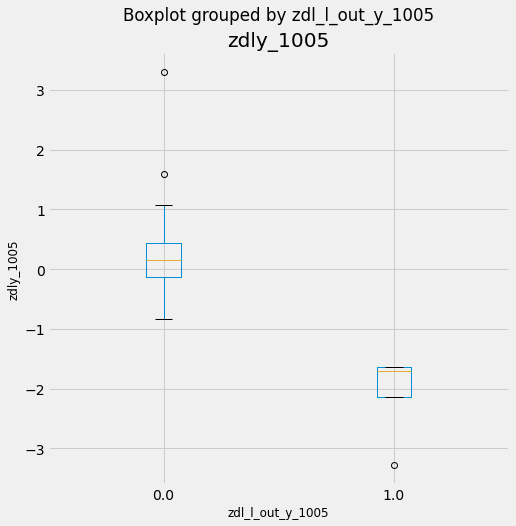

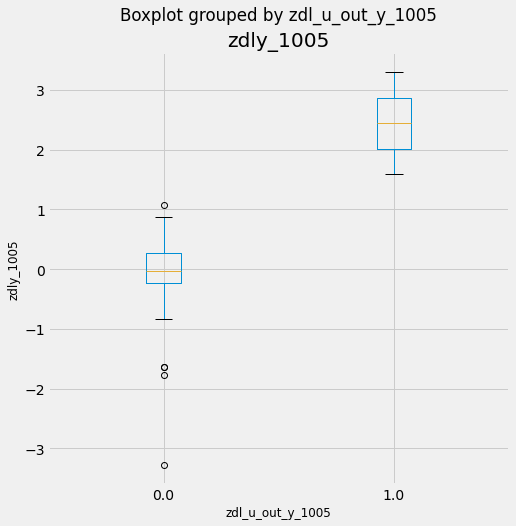

In [ ]:
def qualiQuantiVariablesAnalysis (varName1, varName2):
    title = varName1 + " per " + varName2
    print("******** " + title + " ********")
    print(zdl_ts_train_validation[[varName1, varName2]].groupby(varName2).describe().T)
    boxVarS = zdl_ts_train_validation.boxplot(column=varName1,figsize=(8,8),vert=True, by=varName2)
    boxVarS.set_ylabel(varName1,fontsize=12)
    boxVarS.set_xlabel(varName2,fontsize=12)
qualiQuantiVariablesAnalysis(zdl_targetsNms[2], zdl_l_outlier_targetNms[2])
qualiQuantiVariablesAnalysis(zdl_targetsNms[2], zdl_u_outlier_targetNms[2])


### Calendar Features Graphics

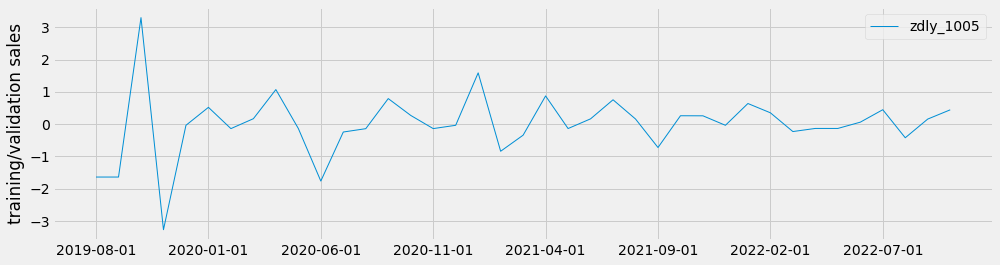

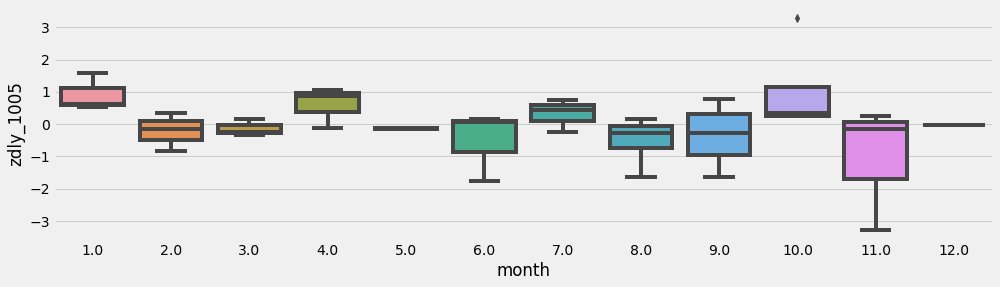

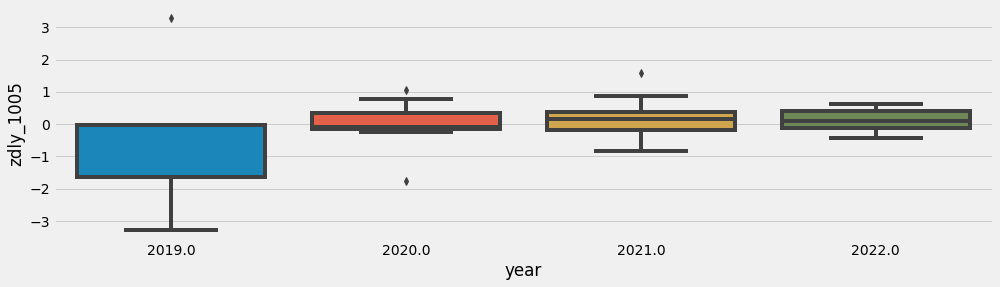

In [ ]:
zdl_ts_train_validation[zdl_targetsNms[2]].plot(style='-',
                                          figsize=(15, 4),
                                          color=color_palette[:1],
                                          ylabel='training/validation sales',
                                          legend=zdl_targetsNms[2],
                                          linewidth=1)
# fig, axs = plt.subplots(figsize=(15, 4))
# sns.boxplot(data=zdl_ts_train_validation, x='dayofweek', y=zdl_targetsNms[2])
# fig, axs = plt.subplots(figsize=(15, 4))
# sns.boxplot(data=zdl_ts_train_validation, x='dayofmonth', y=zdl_targetsNms[2])
fig, axs = plt.subplots(figsize=(15, 4))
sns.boxplot(data=zdl_ts_train_validation, x='month', y=zdl_targetsNms[2])
fig, axs = plt.subplots(figsize=(15, 4))
sns.boxplot(data=zdl_ts_train_validation, x='year', y=zdl_targetsNms[2])
plt.show()

### Lag Features Graphics

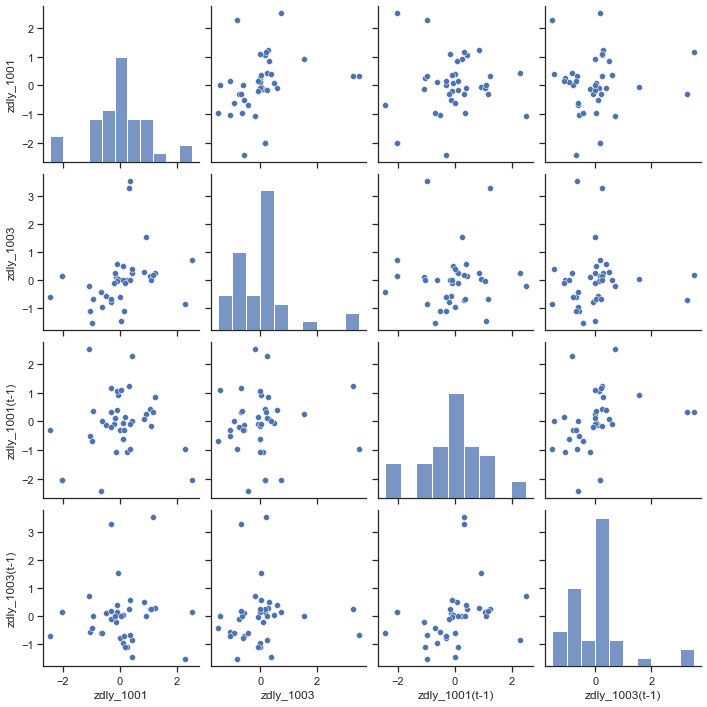

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(zdl_ts_train_validation[zdl_targetsNms[:2] + [(targetNm + '(t-1)') for targetNm in zdl_targetsNms[:2]]])
plt.show();

In [ ]:
zdl_ts_train_validation[zdl_targetsNms].head(2)

zdly_1001  zdly_1003  zdly_1005  zdly_1007  zdly_1009  zdly_1011  \
2019-08-01  -2.028906   0.161282  -1.641972   -0.21043   1.040223   1.796772   
2019-09-01  -2.028906   0.161282  -1.641972   -0.21043   1.040223   1.796772   

            zdly_1013  zdly_1015  zdly_1017  zdly_1019  ...  zdly_56029  \
2019-08-01   0.254454   0.252249  -2.935665  -0.342663  ...   -0.339479   
2019-09-01   0.254454   0.252249  -2.935665  -0.342663  ...   -0.339479   

            zdly_56031  zdly_56033  zdly_56035  zdly_56037  zdly_56039  \
2019-08-01   -1.749026   -0.034563   -0.104101    2.468208    0.501311   
2019-09-01   -1.749026   -0.034563   -0.104101    2.468208    0.501311   

            zdly_56041  zdly_56043  zdly_56045    zmzdly  
2019-08-01   -1.540504    0.762782   -0.581612 -0.084085  
2019-09-01   -1.540504    0.762782   -0.581612 -0.084085  

[2 rows x 3136 columns]